# Udacity Data Scientist Nanodegree - Project 1
*Exploration of data from a 2019 Stack Overflow Survey, folowing the CRISP-DM data mining standard*

B. W., January 2020 

## Business Understanding

Data gathered during the Stack Overflow survey has an abundance of data regarding Stack Overflow user's backgrounds, careers, interests and job satisfaction. Because Stack Overflow is primarily a platform for code sharing and version control, Stack Overflow user's data can give insight on programmers and the technology sector. The following questions are of interest to me as a newcomer to the world of tech: 





1. How important are open source tools to Stack Overflow users?
	1. Which environment do they use?
	2. Which operating system do they use
	3. How often do they contribute to open source?
	4. What are their opinions of open source code?

2. What background do Stack Overflow users have?
	1. What is the gender distribution of Stack Overflow users?
	2. How old are Stack Overflow users?
	3. What level of education do they have?
	4. What major do Stack Overflow users have?
	5. Where do Stack Overflow users live?



3. What are the trends for Stack Overflow user's salaries? 
	1. How much money do Stack Overflow users earn does this depend on their gender?
	2. Is there a correlation between age and income?
	3. How do salaries compare across 14 countries with the most amount of Stack Overflow users, and South Africa (my country of residence)?

## Data Understanding

### Data Import

Survey results for 2019 were downloaded from Stack Overflow as `survey_results_public.csv`. An explanation of the column labels is given `survey_results_schema.csv` in the git repository . 

To answer the questions in the above business understanding section, the following columns are relevant:


1. Columns relevant for determining Stack Overflow user opinion regarding open source tools
    1. 'DevEnviron' - *Environment used*
    2. 'OpSys' - *Operating system used*
    3. 'OpenSourcer' - *How often contributes to open source projects*
    4. 'OpenSource' - *Opinion of open source code quality*



2. Columns relevant to Stack Overflow user's background
    1. 'Gender'
    2. 'Age'
    3. 'EdLevel' - *Highest level of education*
    4. 'UndergradMajor' - *Undergraduate major*
    5. 'Country' - *Country of residence*


3. Columns relevant in determining trends in Stack Overflow user's salaries
    1. 'ConvertedComp' - *Salary converted to USD / year assuming 12 working months and 50 working weeks, using the exchange rate of 2019-02-01*
    2. 'Gender'
    3. 'Age'
    4. 'UndergradMajor' - *Undergraduate major*
    5. 'OpSys' - *Operating system used*
    6. 'DevEnviron' - *Environment used*

In [1]:
# import relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import and make a copy of survey data 
df_original = pd.read_csv("./data/survey_results_public.csv")
df = df_original.copy()

In [3]:
# reduction of dataframe to relevant columns
df = df[['OpenSourcer', 'OpenSource', 'DevEnviron', 'OpSys', 
         'Country', 'EdLevel', 'UndergradMajor', 'Age', 'Gender', 'ConvertedComp']]
df.head()

,OpenSourcer,OpenSource,DevEnviron,OpSys,Country,EdLevel,UndergradMajor,Age,Gender,ConvertedComp
0,Never,The quality of OSS and closed source software ...,IntelliJ;Notepad++;PyCharm,Windows,United Kingdom,Primary/elementary school,NaN,14.0,Man,NaN
1,Less than once per year,The quality of OSS and closed source software ...,Atom;PyCharm,Windows,Bosnia and Herzegovina,"Secondary school (e.g. American high school, G...",NaN,19.0,Man,NaN
2,Never,The quality of OSS and closed source software ...,Vim;Visual Studio Code,Linux-based,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,28.0,Man,8820.0
3,Never,The quality of OSS and closed source software ...,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",22.0,Man,61000.0
4,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",IntelliJ;Notepad++;Vim,Linux-based,Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",30.0,Man,NaN


### Assessment

In [4]:
# first pass understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OpenSourcer     88883 non-null  object 
 1   OpenSource      86842 non-null  object 
 2   DevEnviron      87317 non-null  object 
 3   OpSys           87851 non-null  object 
 4   Country         88751 non-null  object 
 5   EdLevel         86390 non-null  object 
 6   UndergradMajor  75614 non-null  object 
 7   Age             79210 non-null  float64
 8   Gender          85406 non-null  object 
 9   ConvertedComp   55823 non-null  float64
dtypes: float64(2), object(8)
memory usage: 6.8+ MB


In [5]:
# the presence of 0 values
(df==0).sum(axis=0)

OpenSourcer         0
OpenSource          0
DevEnviron          0
OpSys               0
Country             0
EdLevel             0
UndergradMajor      0
Age                 0
Gender              0
ConvertedComp     199
dtype: int64

In [6]:
# the presence of NaN values
df.isna().sum(axis=0)

OpenSourcer           0
OpenSource         2041
DevEnviron         1566
OpSys              1032
Country             132
EdLevel            2493
UndergradMajor    13269
Age                9673
Gender             3477
ConvertedComp     33060
dtype: int64

In [7]:
# value counts of all columns
for n in df.columns:
    print('COLUMN:', n)
    print(df[n].value_counts(dropna=False))
    print('\n')

COLUMN: OpenSourcer
Never                                                 32295
Less than once per year                               24972
Less than once a month but more than once per year    20561
Once a month or more often                            11055
Name: OpenSourcer, dtype: int64


COLUMN: OpenSource
The quality of OSS and closed source software is about the same                    41527
OSS is, on average, of HIGHER quality than proprietary / closed source software    36556
OSS is, on average, of LOWER quality than proprietary / closed source software      8759
NaN                                                                                 2041
Name: OpenSource, dtype: int64


COLUMN: DevEnviron
Visual Studio Code                                                                        5036
Visual Studio;Visual Studio Code                                                          3840
Notepad++;Visual Studio;Visual Studio Code                                               

## Data Preparation

* 0 values and NaN are not a problem in this dataset and do not have to be removed. 
* 'DevEnviron' contains delimited data, which may need to be parsed.
* 'Gender' contains a variety of delimited data for gender minorities. These will be grouped to 'Other'.

In [8]:
# value counts of parsed 'DevEnviron' data.
enviro = df['DevEnviron'].str.split(pat=';', expand=True).unstack().value_counts()
enviro

Visual Studio Code    44311
Visual Studio         27490
Notepad++             26621
IntelliJ              22166
Vim                   22163
Sublime Text          20424
Android Studio        14787
Eclipse               12591
PyCharm               11724
Atom                  11636
IPython / Jupyter      8317
Xcode                  8239
PHPStorm               6645
NetBeans               5121
Emacs                  3922
RStudio                2940
RubyMine               1202
TextMate                805
Coda                    578
Komodo                  368
Zend                    307
Light Table             178
dtype: int64

In [9]:
# replace genders other than 'Man' and 'Woman' to 'Other'
df.loc[((df['Gender']!='Man') == (df['Gender']!='Woman')) == (df['Gender'].notna()), 'Gender'] = 'Other'
df['Gender'].value_counts(dropna=False)

Man      77919
Woman     6344
NaN       3477
Other     1143
Name: Gender, dtype: int64

## Modeling

''

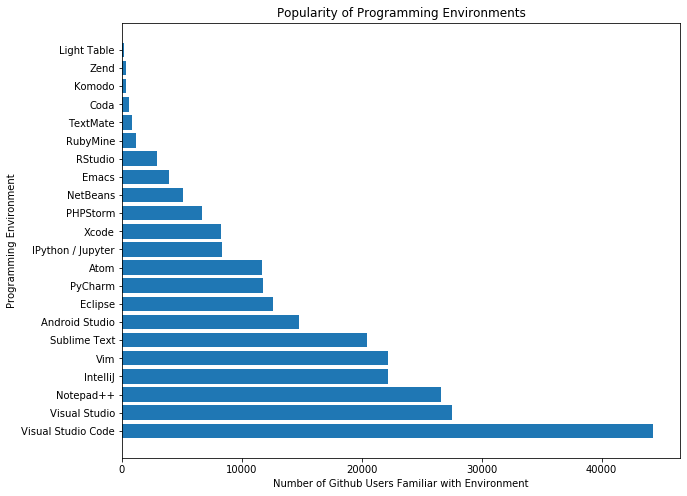

In [10]:
# plot barchart of how often users reportad a programming environment
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(enviro.index, width=enviro)
ax.set_title('Popularity of Programming Environments')
ax.set_xlabel('Number of Stack Overflow Users Familiar with Environment')
ax.set_ylabel('Programming Environment')
;

The most used environment is Microsoft's Visual Studio Code and Visual Studio. This could be interpreted to mean that proprietary software is more popular, but this is not the case. There is a larger variety of open source environments to choose from, meaning that the fans of open source software are 'spread thin' between all the available open source environments.

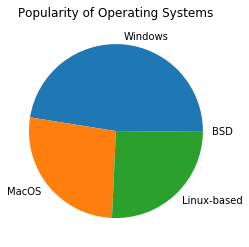

In [11]:
# popularity of operating systems
plt.pie(df['OpSys'].value_counts(), labels=df['OpSys'].value_counts().index)
plt.title('Popularity of Operating Systems');

About half of users use Windows and roughly a quarter use Linux and Mac respectively. One quarter of Stack Overflow users buy into an open source operating system.

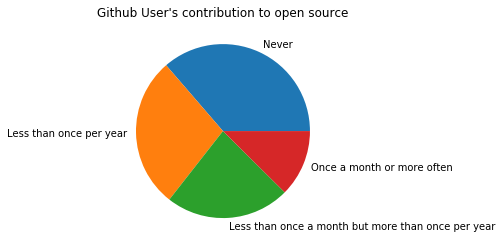

In [12]:
# Contributions to open source
plt.pie(df['OpenSourcer'].value_counts(), labels = df['OpenSourcer'].value_counts().index)
plt.title("Stack Overflow User's contribution to open source");

Only a sixth of Stack Overflow users contribute regularly (more than once per month) to open source projects. 

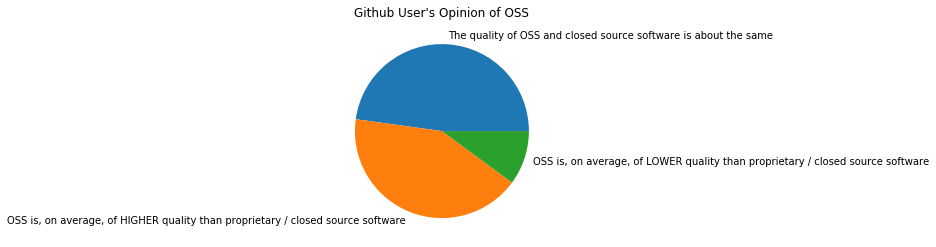

In [13]:
# users opinion of open source code
plt.pie(df['OpenSource'].value_counts(), labels = df['OpenSource'].value_counts().index)
plt.title("Stack Overflow User's Opinion of OSS");

Open source code is generally either considered to be on-par-with or better then proprietary software.

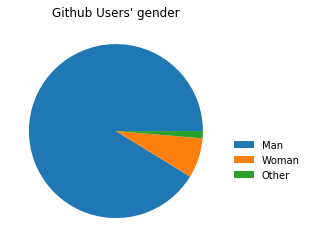

In [14]:
# gender of Stack Overflow users
fig, ax = plt.subplots()
ax.pie(df['Gender'].value_counts())
ax.legend(labels=df['Gender'].value_counts().index,  frameon=False, bbox_to_anchor=(1, 0.5))
ax.set_title("Stack Overflow Users' gender");  
      

Only a small minoriy of Stack Overflow users are women

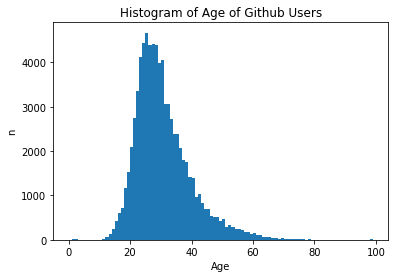

In [15]:
# age distribution of Stack Overflow users
plt.hist(df['Age'], bins=range(0, 100))
plt.title('Histogram of Age of Stack Overflow Users')
plt.xlabel('Age')
plt.ylabel('n');

the histogram is skewed to the right and shows that most Stack Overflow users are 25 - 30 years old. 

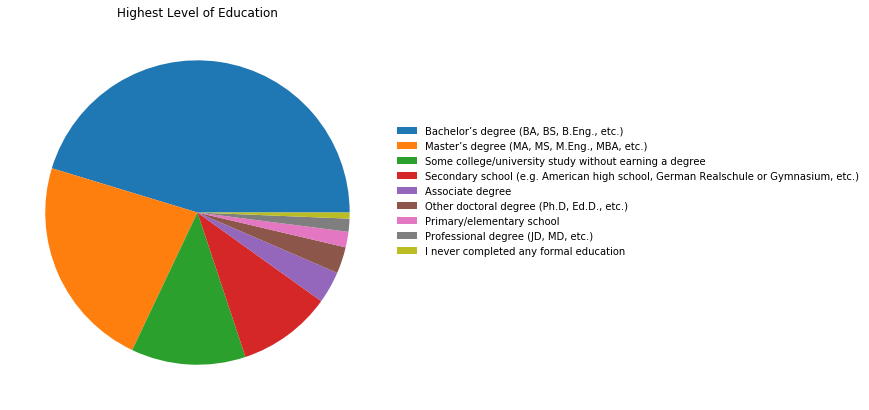

In [16]:
# highers level of education
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(df['EdLevel'].value_counts())
ax.legend(labels=df['EdLevel'].value_counts().index,  frameon=False, bbox_to_anchor=(1, 0.75))
ax.set_title('Highest Level of Education');

Almost three quarters of Stack Overflow users have a Bachelor's or Master's degree, suggesting that programmers generally have tertiary education

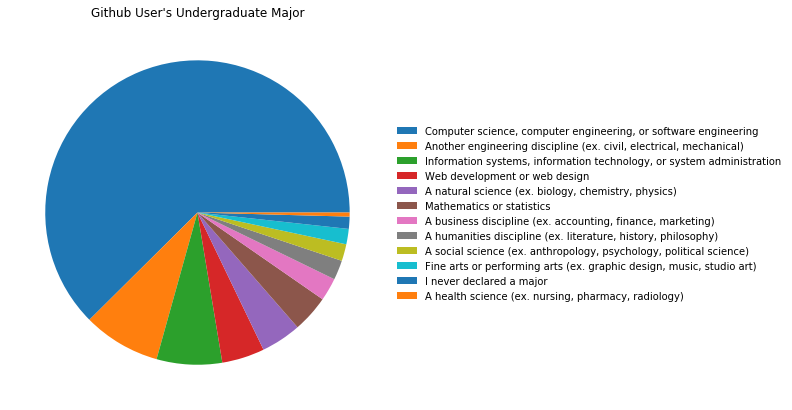

In [17]:
# udergraduate major
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(df['UndergradMajor'].value_counts())
ax.legend(labels=df['UndergradMajor'].value_counts().index,  frameon=False, bbox_to_anchor=(1, 0.75))
ax.set_title("Stack Overflow User's Undergraduate Major");

Almost three quarters of Stack Overflow users have a major in a tech-related field (CompSci, web development or information systems).  

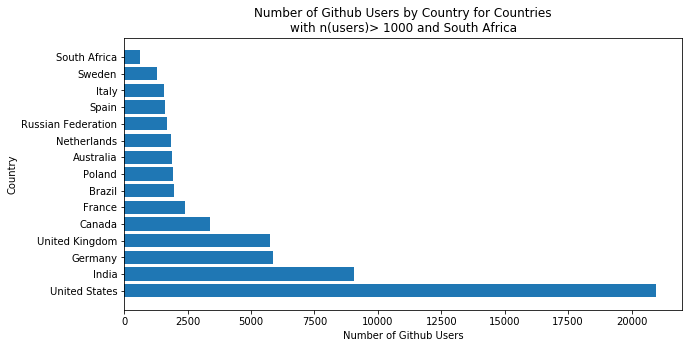

In [18]:
# number of Stack Overflow users by country for countries with n(users) > 1000 and South Africa.
country_sum = df['Country'].value_counts()
country_sum = country_sum[np.logical_or(country_sum>=1000, country_sum.index=='South Africa')]

fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(country_sum.index, width=country_sum)
ax.set_title('Number of Stack Overflow Users by Country for Countries\nwith n(users)> 1000 and South Africa')
ax.set_xlabel('Number of Stack Overflow Users')
ax.set_ylabel('Country');

Most Stack Overflow users are from the USA, followed by India. 

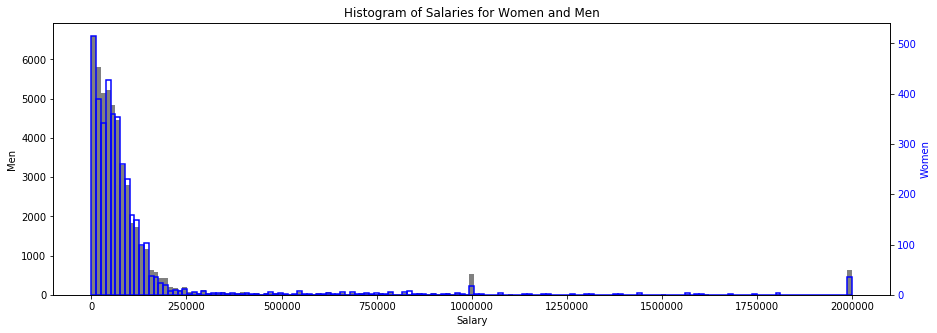

In [19]:
# histogram of salaries for Women and Men

fig, ax = plt.subplots(figsize=(15, 5))

ax.hist(df[df['Gender']=='Man']['ConvertedComp'], bins=np.linspace(0, 2000000, 160), color='grey')
ax.set_ylabel('Men')
axtwin = ax.twinx()
axtwin.hist(df[df['Gender']=='Woman']['ConvertedComp'], bins=np.linspace(0, 2000000, 160), fill=False, edgecolor='b', linewidth=1.5)
axtwin.set_ylabel('Women', color='b')
axtwin.tick_params(axis='y', labelcolor='b')

ax.set_title('Histogram of Salaries for Women and Men')
ax.set_xlabel('Salary');

There are far fewer female Stack Overflow users than men, which may be due to some sort of discrimination, but the histogram for salaries earned by women and men have a similar shape, suggesting that there is no gender discrimination when it comes to salaries in the tech industry. It must be said that when it comes to very high salaries > 1000000 /annum, women earn less than men. 

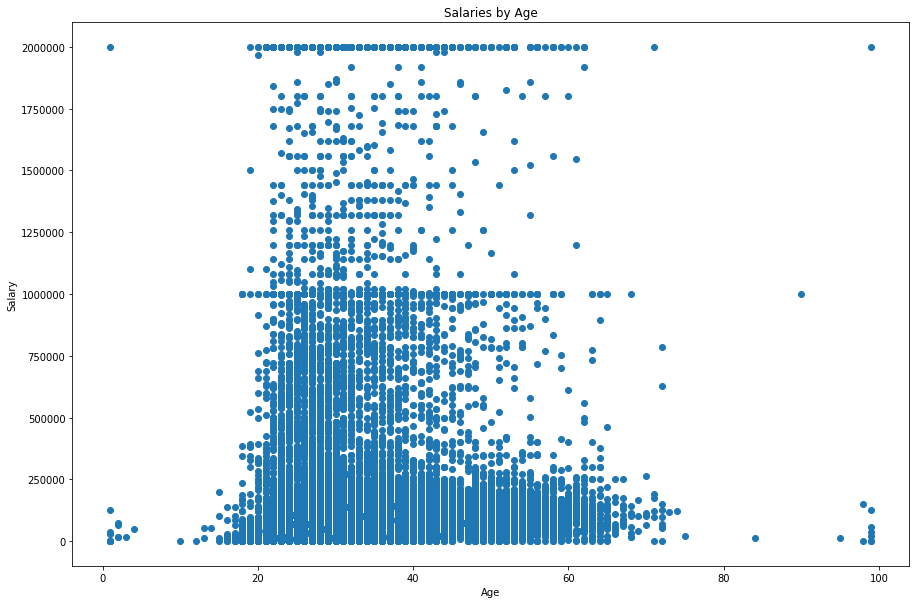

In [20]:
# scatterplot of salaries by age
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(df['Age'], df['ConvertedComp'])
ax.set_title('Salaries by Age')
ax.set_xlabel('Age')
ax.set_ylabel('Salary');

This scatter plot seems to indicate that you either have a fast increase in salary, before you are 40, or you get stuck at you saraly. This scatterplot places emphasis on the outliers, and therefore it is suggested to look at the following 2D kde plot. 

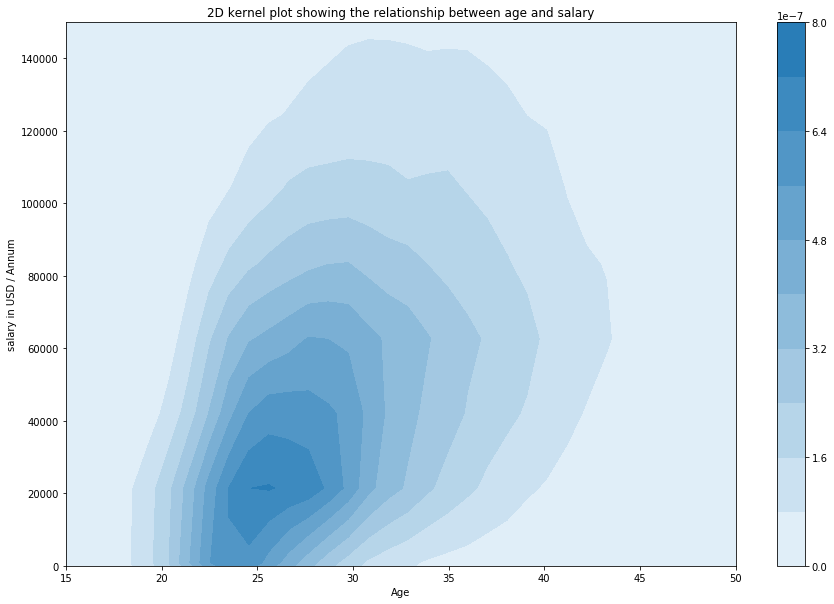

In [21]:
# 2d kdeplot of salary vs age
fig, ax = plt.subplots(figsize=(15, 10))
dfplt = df.dropna(subset=['Age', 'ConvertedComp'])
ax = sns.kdeplot(dfplt['Age'], dfplt['ConvertedComp'], shade=True, cbar=True)
#ax.scatter(dfplt['Age'], dfplt['ConvertedComp'], s=1, color="b")
ax.set_xlim(left=15, right=50)
ax.set_ylim(top=150000, bottom=0)
ax.set_title('2D kernel plot showing the relationship between age and salary')
ax.set_ylabel('salary in USD / Annum')
ax.set_xlabel('Age');

This kdeplot shows that Stack Overflow users in general earn more with increasing age. The variation of earnings increases with age. 

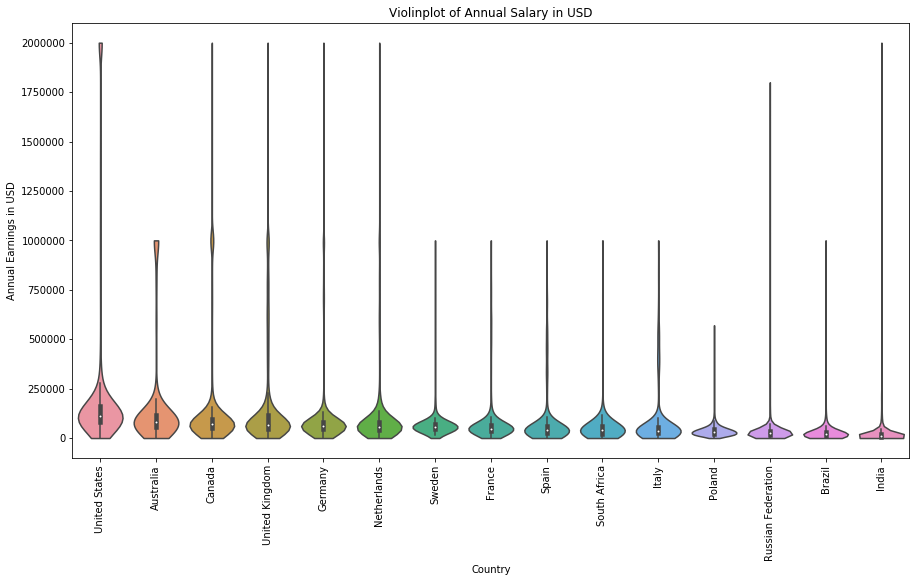

In [22]:
#violinplot of salaries by country in usd/annum. Countries with n>1000 and South Africa are plotted

grp = df.groupby('Country')
grp = grp.filter(lambda x: len(x)>=1000 or x.name == 'South Africa')
sorting = grp.groupby('Country')['ConvertedComp'].median().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.violinplot(x='Country', y='ConvertedComp', data=df, kind='violin', cut=0, order=sorting, scale='width')
ax.set_xlabel(ax.get_xlabel())
ax.set_ylabel('Annual Earnings in USD')
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation='vertical')
ax.set_title('Violinplot of Annual Salary in USD')

del(grp, sorting);


This violinplot shows the distribution of salaries by country, ordered by median salary of country. Interestingly english-speaking countries lead the way. In general the worst salaries are in India. 

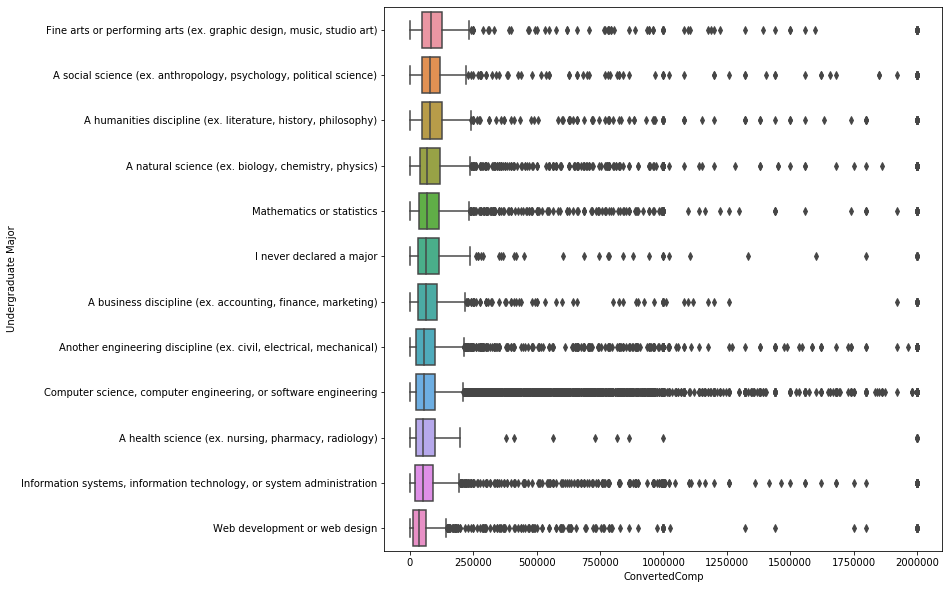

In [23]:
# boxplot of annual earnings in USD by undergraduate major

sorting = df.groupby('UndergradMajor')['ConvertedComp'].median().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.boxplot(y='UndergradMajor', x='ConvertedComp', data=df, order=sorting)
ax.set_ylabel('Undergraduate Major')

del(sorting);

Surprisingly, Stack Overflow users with a tech-related major (web development, information systems or CompSci) earn less, by median, than users with a major in social sciences, fine arts or humanities. 

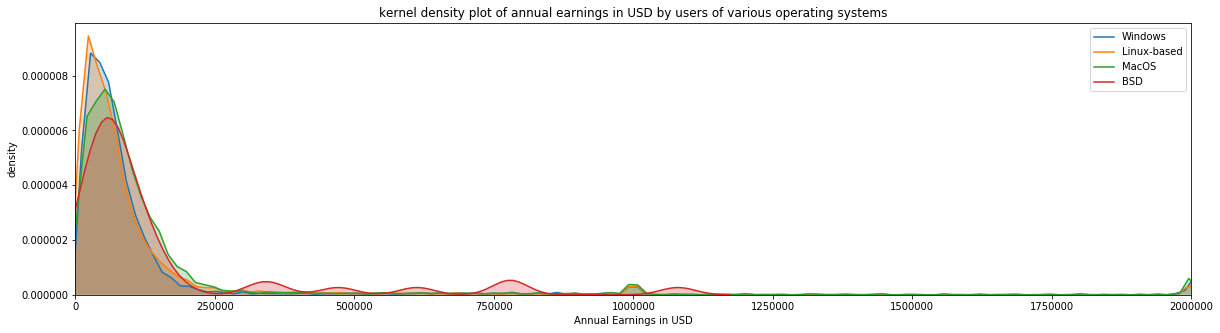

In [24]:
# kde plot of salary by operating system used

fig, ax = plt.subplots(figsize=(20, 5))

for i, n in enumerate(df['OpSys'].unique()):
    ax = sns.kdeplot(df.loc[df['OpSys']==n, 'ConvertedComp'], shade=True, label=n)
    
ax.set_xlim(0, 2000000)
ax.set_title('kernel density plot of annual earnings in USD by users of various operating systems')
ax.set_ylabel('density')
ax.set_xlabel('Annual Earnings in USD');

Salaries earned by operating system used look relatively similar. The main difference is the intensity of the peak at ~USD 75000

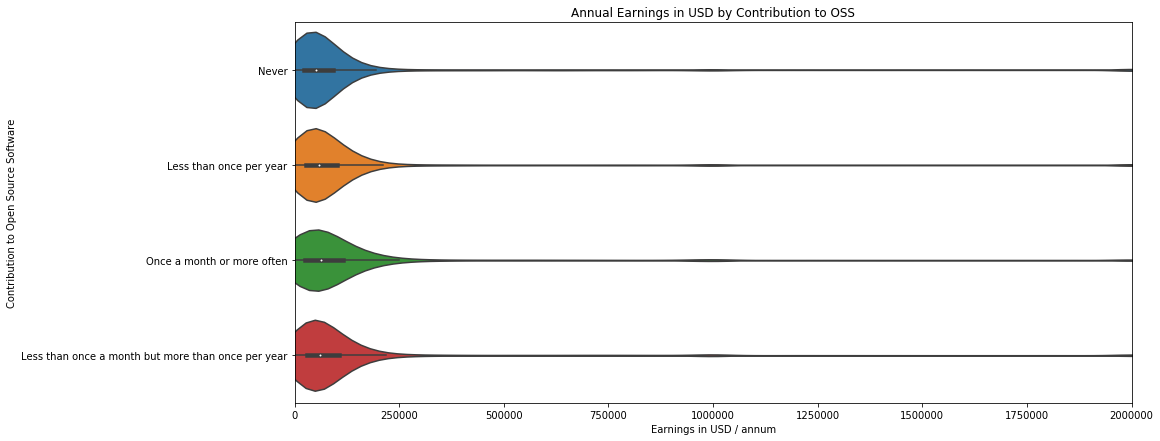

In [25]:
# annual earnings in USD categorised by contributions to open source

fig, ax = plt.subplots(figsize=(15, 7))

ax = sns.violinplot(data=df, y='OpenSourcer', x='ConvertedComp')
ax.set_xlabel('Earnings in USD / annum')
ax.set_ylabel('Contribution to Open Source Software')
ax.set_title('Annual Earnings in USD by Contribution to OSS')
ax.set_xlim((0, 2000000));

The distribution of salaries does not differ significantly when grouped by contribution to OSS.

## Evaluation


**Q1: How important are open source tools to Stack Overflow users?**

Top 2 environments are MS Visual Studio Code and MS Visual Studio, suggesting that most users are pro-propitiatory, however there are much larger number of open source environments to choose from, and in total, most use open source. It must be said that only  ~one quarter use linux and ~one eighth contribute to open source projects more than once per month. Most users think that open source software is on par with or better than proprietary software. 

In general, Stack Overflow users see the value in OSS, but not many contribute to it. 



**Q2: What background do Stack Overflow users have?**

Most are men, between 25 and 30 years in age. Three quarters have Bachelor or Master level tertiary education. Only few do not have tertiary education. Three quarters also have a major in a tech-related field. By far most Stack Overflow users come from the USA, followed by India, Germany, the UK and Canada. 


**Q3: What are the trends for Stack Overflow user's salaries?**

As might be expected, the number of Stack Overflow users decreases with increasing earnings. A salary of USD1000000/year and USD2000000/year seem to be standard salaries for very high earners. Even though there are much fewer female than male Stack Overflow users, their salary distribution seems similar, but women do earn less on the very high end of the salary spectrum. In general one earns more with increasing age, but the older, the larger the spread of salaries, suggesting that ones skill and dedication in ones career matter. Salaries in English-speaking countries are the highest, while India and Brazil have the lowest salaries. Surprisingly, the median salary of users with a tech-related major is lower than median salary of users with humanities major. No real differences in earnings by operating system used. 


## Deployment

Stack Overflow users are mostly involved in the tech industry and therefore some parallells can be made with regard to this industry. In the context of this exersize, I interpret the “deployment” section of the CRISP-DM methodolotgy to include recommendations to myself or other individual who is intending to start a career in the tech industry. This will include 1) recommendations on going into a more open source vs proprietory career path, 2) looking if bias against people with a certain backgrounds exists and 3) what sort of earnings might be expected in this career path. 